In [1]:
import folium as fm, matplotlib.pyplot as plt, numpy as np, os, pandas as pd, seaborn as sns
from folium import plugins as fmpg

In [2]:
data = pd.read_csv('globalterrorismdb_0617dist.csv', encoding='ISO-8859-1')

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head(3)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


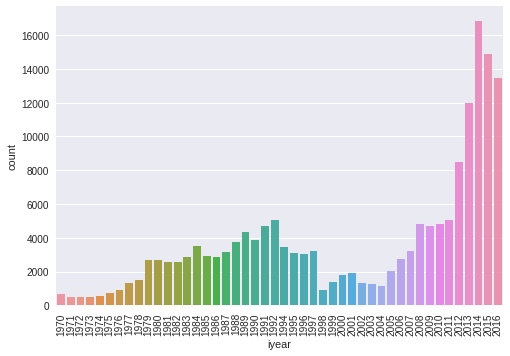

In [4]:
sns.countplot('iyear', data=data)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


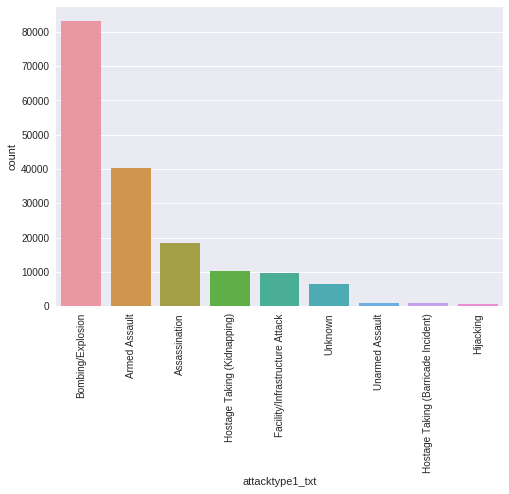

In [5]:
sns.countplot('attacktype1_txt', data=data, order=data['attacktype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [6]:
data['casualities'] = data['nkill']+data['nwound']
data_casualities = data['casualities'].dropna()
data_casualities = data_casualities[~(data_casualities == 0)]

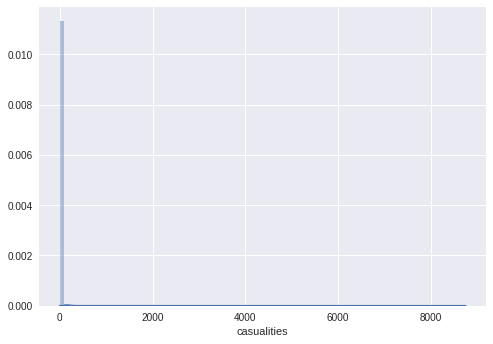

In [7]:
sns.distplot(data_casualities, kde=True, bins=100)
plt.show()

In [8]:
data[data['casualities'] > 2000]

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,casualities
58770,199503200014,1995,3,20,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,5513.0
67999,199808070002,1998,8,7,NaN,0,NaN,104,Kenya,11,...,"Laura Myers, U.S. promises to hit back if any...","Kenya; New Twist in bomb Tragedy, Africa New...","Blast toll tops 200, Evening Herald (Plymout...",CETIS,0,1,1,1,"199808070002, 199808070003",4224.0
73054,200109110004,2001,9,11,NaN,0,NaN,217,United States,1,...,"United States Government, The 9/11 Commission ...","Lindsay Kines, United States on high alert af...","Joe Frolick, Hijackers Ram Two Airliners Into...",CETIS,0,1,0,1,"200109110004, 200109110005, 200109110006, 2001...",8749.0
73055,200109110005,2001,9,11,NaN,0,NaN,217,United States,1,...,"United States Government, The 9/11 Commission ...","Lindsay Kines, United States on high alert af...","Joe Frolick, Hijackers Ram Two Airliners Into...",CETIS,0,1,0,1,"200109110005, 200109110004, 200109110006, 2001...",8747.0


In [9]:
data.iloc[73054]['scite3']

'Joe Frolick, \x93Hijackers Ram Two Airliners Into World Trade Center, Third Plane Slams Into Pentagon, Fourth Crashes Near Pittsburgh; Thousands Die; Bush Vows Swift Revenge,\x94 The Plain Dealer, September 12, 2001.'

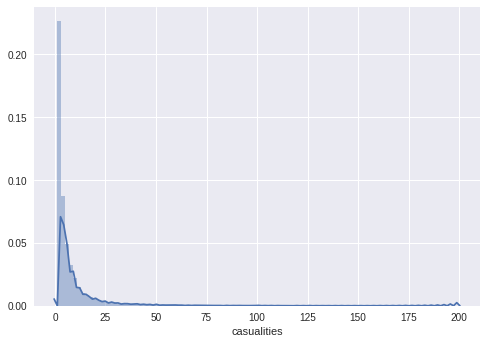

In [10]:
sns.distplot(data_casualities[data_casualities < 200], kde=True, bins=100)
plt.show()

In [11]:
# Source: https://alcidanalytics.com/p/geographic-heatmap-in-python

In [12]:
data_loc_casu = data[['casualities', 'latitude', 'longitude']].dropna()

In [13]:
lat = list(data_loc_casu[data_loc_casu['casualities'] >= 75].latitude)
lng = list(data_loc_casu[data_loc_casu['casualities'] >= 75].longitude)
csl = data_loc_casu[data_loc_casu['casualities'] >= 75].casualities
locations = list(zip(lat, lng, csl))

In [14]:
max_amt = float(data[data['casualities']>=75]['casualities'].max())

In [15]:
hmap = fm.Map(location=[42.5, -75.5], zoom_start=5, )

In [16]:
hm_wide = fmpg.HeatMap(locations, 
                       min_opacity=0.2, 
                       max_val=max_amt,
                       radius=17, blur=15,
                       max_zoom=1,)

In [17]:
hmap.add_child(hm_wide)

In [18]:
hmap.save(os.path.join('heatmap.html'))

In [19]:
tgup10 = data[data['gname'].isin(data['gname'].value_counts()[1:11].index)]

In [20]:
pd.crosstab(tgup10.iyear, tgup10.gname).tail()

gname,Al-Shabaab,Boko Haram,Farabundo Marti National Liberation Front (FMLN),Irish Republican Army (IRA),Islamic State of Iraq and the Levant (ISIL),Kurdistan Workers' Party (PKK),New People's Army (NPA),Revolutionary Armed Forces of Colombia (FARC),Shining Path (SL),Taliban
iyear,,,,,,,,,,
2012,233,424,0,0,0,140,86,85,5,800
2013,319,233,0,0,373,21,210,105,10,773
2014,865,493,0,0,1247,65,289,163,9,1033
2015,387,538,0,0,1220,335,322,77,6,1249
2016,554,237,0,0,1447,362,172,6,2,1064


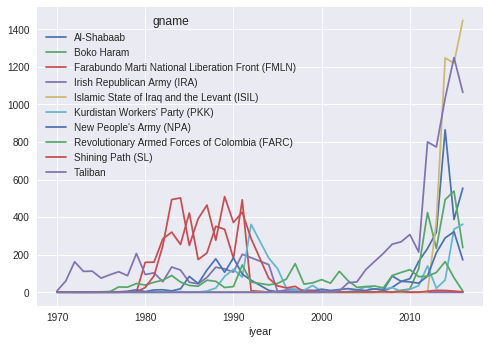

In [21]:
pd.crosstab(tgup10.iyear, tgup10.gname).plot()
plt.show()

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


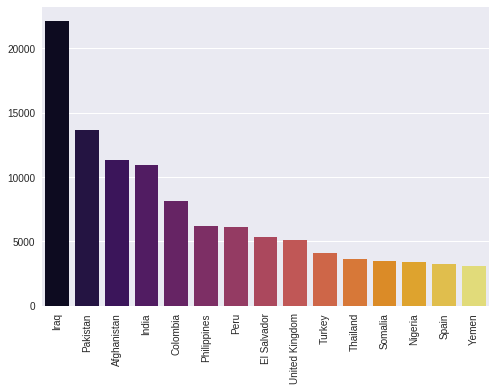

In [22]:
sns.barplot(data['country_txt'].value_counts()[:15].index, data['country_txt'].value_counts()[:15].values, palette='inferno')
plt.xticks(rotation=90)
plt.show()